In [1]:
import pandas as pd
import numpy as np
from mlxtend.plotting import plot_decision_regions


In [2]:
df  = pd.DataFrame()

In [3]:
df['feature1'] = [1,2,3,4,5,6,6,7,9,9]
df['feature2'] = [5,3,6,8,1,9,5,8,9,2]
df['target'] = [1,1,0,1,0,1,0,1,0,0]

In [4]:
df

,feature1,feature2,target
0,1,5,1
1,2,3,1
2,3,6,0
3,4,8,1
4,5,1,0
5,6,9,1
6,6,5,0
7,7,8,1
8,9,9,0
9,9,2,0


<Axes: xlabel='feature1', ylabel='feature2'>

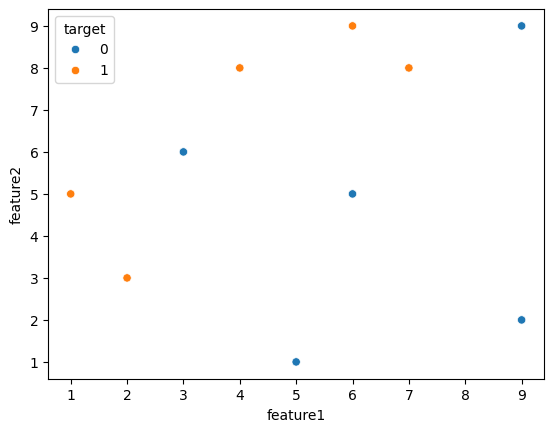

In [5]:
import seaborn as sns
sns.scatterplot(x=df['feature1'],y=df['feature2'],hue=df['target'])

In [6]:
df.shape

(10, 3)

In [7]:
df['weight'] = 1/df.shape[0]

In [8]:
df

,feature1,feature2,target,weight
0,1,5,1,0.1
1,2,3,1,0.1
2,3,6,0,0.1
3,4,8,1,0.1
4,5,1,0,0.1
5,6,9,1,0.1
6,6,5,0,0.1
7,7,8,1,0.1
8,9,9,0,0.1
9,9,2,0,0.1


In [9]:
from sklearn.tree import DecisionTreeClassifier

In [10]:
dt1 = DecisionTreeClassifier(max_depth=1)

In [11]:
X = df.iloc[:,0:2].values
y = df.iloc[:,2].values

In [12]:
dt1.fit(X,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[0] <= 2.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.75, 0.25, 'gini = 0.469\nsamples = 8\nvalue = [5, 3]')]

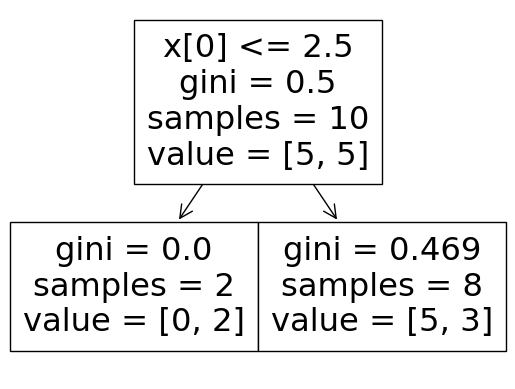

In [13]:
from sklearn.tree import plot_tree
plot_tree(dt1)

<Axes: >

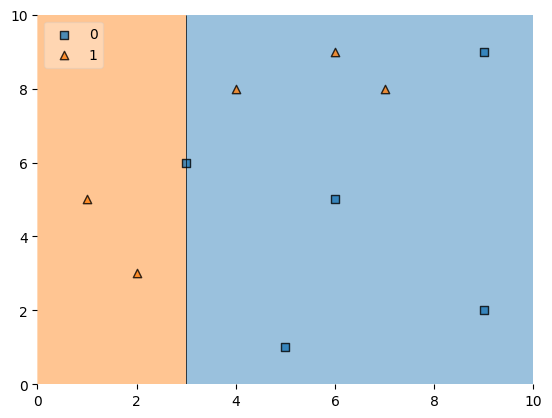

In [14]:
plot_decision_regions(X,y, clf=dt1, legend=2)

In [15]:
df['ypred'] = dt1.predict(X)

In [16]:
df

,feature1,feature2,target,weight,ypred
0,1,5,1,0.1,1
1,2,3,1,0.1,1
2,3,6,0,0.1,0
3,4,8,1,0.1,0
4,5,1,0,0.1,0
5,6,9,1,0.1,0
6,6,5,0,0.1,0
7,7,8,1,0.1,0
8,9,9,0,0.1,0
9,9,2,0,0.1,0


In [17]:
def calculate_model_weight(error):
    return 0.5*np.log((1-error)/(error))

In [18]:
alpha1 = calculate_model_weight(0.3)

In [19]:
df

,feature1,feature2,target,weight,ypred
0,1,5,1,0.1,1
1,2,3,1,0.1,1
2,3,6,0,0.1,0
3,4,8,1,0.1,0
4,5,1,0,0.1,0
5,6,9,1,0.1,0
6,6,5,0,0.1,0
7,7,8,1,0.1,0
8,9,9,0,0.1,0
9,9,2,0,0.1,0


In [80]:
def updatedweigths(row,alpha=0.423):
    if row['target'] == row['ypred']:
        return row['weights'] * np.exp(-alpha)
    else:
        return row['weights'] * np.exp(alpha)

In [82]:
df['updated_weight'] = df.apply(updatedweigths,axis=1)

KeyError: 'weights'

In [83]:
df

,feature1,feature2,target,weight,ypred
0,1,5,1,0.1,1
1,2,3,1,0.1,1
2,3,6,0,0.1,1
3,4,8,1,0.1,1
4,5,1,0,0.1,0
5,6,9,1,0.1,1
6,6,5,0,0.1,1
7,7,8,1,0.1,1
8,9,9,0,0.1,1
9,9,2,0,0.1,0
